### HOMEWORK 5
#### VAISHNAVI JAMDADE(TM39453)

### Importing required libraries :

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#from random import normal
import math
from sklearn.metrics import accuracy_score,r2_score

### Creating gaussian distributions and then clustering them together as one complete input dataset: 

In [2]:
def createdata(v):
    
    np.random.seed(0)
    dis1=np.random.normal(0,v,50)
    dis2=np.random.normal(5,v,50)
    dis3=np.random.normal(10,v,50)
    A=np.concatenate([dis1,dis2])
    X=np.concatenate([A,dis3])
    X
    return X,v


In [3]:
X,varT=createdata(1)
X.shape, varT

((150,), 1)

### Plotting the data:

C:\Users\vaish\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


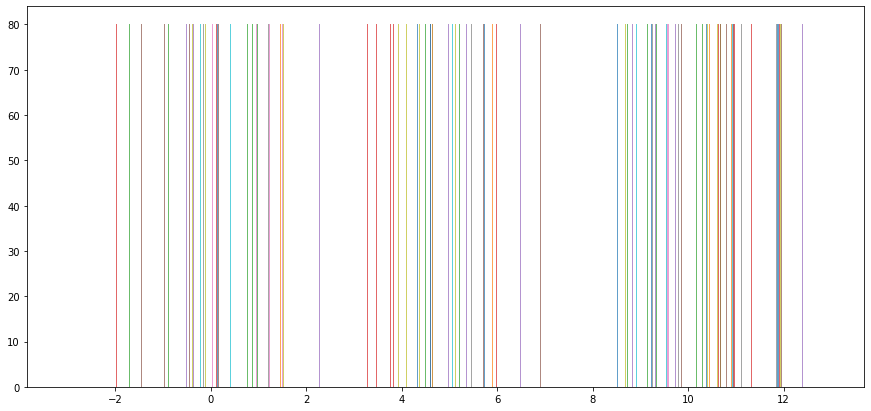

<Figure size 1080x504 with 0 Axes>

In [4]:

def plot_hist(data):
    plt.figure(figsize=(15,7))
    for x in data:
        plt.hist(x, bins = 80, normed = True, alpha = 0.7)
    #plt.xlim(-10, 20)
    plt.figure(figsize=(15,7))
    
plot_hist(X)


### Function to initialize random means, variances and prior probabilities: 

In [5]:
def initialize(X,K):
    
    m=np.array([2.,3.,7.])             #random means
    #m=np.random.choice(X,size=3) 
    #v=np.array([var1,var1,var1])
    v=np.ones((3))                     #random variances set to 1 initially
    w=np.ones((K))/K                   #random prior weights set to equal
    #posterior probability that each input belongs to each of the 3 gaussians
    posterior=np.zeros((len(X),K),dtype=float)
    return m,v,w,posterior

### True assignment of data samples to respective Gaussians and means:

In [6]:
Y=[0]*50 + [1]*50 + [2]*50

### Function to evaluate accuracy:

In [7]:
def accuracy(pred,true,K):
    diff=[]
    summ=0    
    for j in range(K):
        #d=abs(pred[j]-true[j])/true[j]
        diff.append((abs(pred[j]-true[j])))
    summ=sum(diff)
    accu=round(((1-summ)*100),2)    
    #accu=summ
        
    return summ,accu

### Function to allocate the probability of each of the data points belonging to each one of the clusters(Soft Allocation):

In [8]:
def GMM(X,K,varc,epochs):
    N=len(X)
    #K=3
    pi=math.pi
    iterations=epochs
    M=[0.,5.,10.]
    V=[varc,varc,varc]
    #V=[1,1,1]
    for iter in range(iterations):
        
        #Expection Step : Calculating Posterior probabilities for each of the inputs to compute probability of inputs belonging to each of the clusters:
        for i in range(len(X)):
            for k in range(K):

                part1=1/math.sqrt(2*pi*(var[k]))
                part2=(-1/2)*((X[i]-means[k])**2)
                part3= part2/(var[k])
                part4=np.exp(part3)
                posterior[i][k]=wprior[k]*part1 * part4

                #posterior[i][k]=wprior[k]*(1/math.sqrt(2*var[k]*pi))*(math.exp(-(1/2)*((X[i]-means[k])**2)))

            posterior[i]=posterior[i]/np.sum(posterior[i])
        
        
        #Maximization Step : Updating parameters : mean, variance, and prior probabilities :
        meanspred=[]
        varpred=[]
        diffmean=[]
        lossmean=[]
        for i in range(K):
            wprior[i]=np.sum(posterior[:,i])/N
            means[i]=np.dot(posterior[:,i],X[:].T)/(np.sum(posterior[:,i]))
            var[i]=np.dot(posterior[:,i],((X-means[i])**2).T)/(np.sum(posterior[:,i]))
            meanspred.append(means[i])
            varpred.append(var[i])
        
        ##### Retrieving Predicted class labels from posterior probabilities :
        li=[]
        for i in range(len(X)):
            li.append(np.argmax(posterior[i]))
        
        
        ######Accuracy Calculation for Mean and Variance at each iteration :
        meanloss,accumean=accuracy(meanspred,M,K)
        varloss,accuvar=accuracy(varpred,V,K)
        ######
        
        
        print("\n")    
        print("Epoch " + str(iter+1) + " : " + "prior probability ="+ str(wprior))
        print("Epoch " + str(iter+1) + " : " + "mean ="+ str(means))
        print("Epoch " + str(iter+1) + " : "+ "variance =" + str(var))
        
        
        #print(meanspred)
        print("Total mean loss is=> ", meanloss)
        #print("R2 score for Mean => ".format(round(r2_score(meanspred,M)*100)))
        print("R2 score of Means after Epoch {} : {}".format(iter+1,round((r2_score(meanspred,M)),2)))
        print("Total variance loss is=> ", varloss)
        print("R2 score of Variance after Epoch {} : {}".format(iter+1,round((r2_score(varpred,V)),2)))
        #print("Accuracy of variance after Epoch {} : {}%".format(iter+1, accuvar))
        totalaccuracy = round((accuracy_score(li, Y)*100),2)
        print("Accuracy of allocation after Epoch {} : {}%".format(iter+1, totalaccuracy))
        #totalaccuracy
        
        
    return (wprior, means,var,totalaccuracy,li)
    #means.shape


In [9]:
X,varT=createdata(1)
means,var,wprior,posterior=initialize(X,3)
wprior,means,var,totalaccuracy,li=GMM(X,3,varT,8)



Epoch 1 : prior probability =[0.31686045 0.18882409 0.49431546]
Epoch 1 : mean =[0.33717436 3.66738246 8.75161024]
Epoch 1 : variance =[2.35235318 2.39087316 5.5254408 ]
Total mean loss is=>  2.918181655155912
R2 score of Means after Epoch 1 : 0.9
Total variance loss is=>  7.268667138969127
R2 score of Variance after Epoch 1 : -2.66
Accuracy of allocation after Epoch 1 : 82.0%


Epoch 2 : prior probability =[0.31282479 0.21029489 0.47688032]
Epoch 2 : mean =[0.15939084 4.19373488 8.79382317]
Epoch 2 : variance =[1.69607986 1.98089977 5.93925414]
Total mean loss is=>  2.1718327879971953
R2 score of Means after Epoch 2 : 0.94
Total variance loss is=>  6.616233771749796
R2 score of Variance after Epoch 2 : -1.3
Accuracy of allocation after Epoch 2 : 87.33%


Epoch 3 : prior probability =[0.31543254 0.23150576 0.4530617 ]
Epoch 3 : mean =[0.07379184 4.49184198 8.9661518 ]
Epoch 3 : variance =[1.2799619  1.30510406 5.65629681]
Total mean loss is=>  1.6157980579320954
R2 score of Means aft

###  Training Accuracy after last epoch :

In [10]:
finalaccuracy = round((accuracy_score(li, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li.count(0),li.count(1),li.count(2))


Final Accuracy of allocation : 99.33%
Number of samples classifed for Gaussians 0, 1, 2 :  50 49 51


### Explanation :

* Initially each of the Gaussians consisted of 50 data points. Here we can see that it successfully predicted and classified the total 150 data points in 3 respective Gaussians(0,1,2). 
* Here I ran my algorithm for 8 epochs since I noticed that after 8th epoch my algorithm started to show no change in parameters which are mean, variance and prior probabilities. 
* I had initilized the parameters such as mean, variance, and prior probability with some random values for computation. Then at the Expectation Step, at each iteration I calculated posterior probabilities(expectations) for each of the inputs to compute probability(expectation) of inputs belonging to each of the clusters where posterior probabilites were computed using likelihood and prior probabilities. 
* Then after getting 3 posterior probablilities for each of the 150 data inputs, by taking argmax of the porbabilities, I calculated the corresponding indexes which are in turn the corresponding Gaussians 0,1,2. Accuracy computation was performed at each step to cacluate the accuracy of classfied samples of data. Here I received an accuracy of 99.33% after 8th epoch. 
* In the Maximization step, parameters (mean, variance and prior probability) were updated at each iteration by using the dedicated formulas given above. In this way we are trying to maximize our likelihood in the next iteration which in turn maximizes our Posterior probability thus attempting to classify more accurately giving better results. 
* Mean and Variance Losses are computed at each step and corresponding R2 score was computed to measure the perfomance of our algorithm by evaluating scores for Mean and Variances for each iteration.

### Trying different variances :

### Configuration 2:

#### For variance 4, that is S.D = 2 :

In [11]:
X2,varT2=createdata(2)
means,var,wprior,posterior=initialize(X2,3)
wprior,means,var,totalaccuracy2,li2=GMM(X2,3,varT2,10)
finalaccuracy2 = round((accuracy_score(li2, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy2))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li2.count(0),li2.count(1),li2.count(2))



Epoch 1 : prior probability =[0.30648201 0.19277336 0.50074463]
Epoch 1 : mean =[0.11791059 3.38532905 9.1104891 ]
Epoch 1 : variance =[4.84651547 1.70415693 7.15811978]
Total mean loss is=>  2.6220924308400537
R2 score of Means after Epoch 1 : 0.92
Total variance loss is=>  8.300478314774864
R2 score of Variance after Epoch 1 : -1.32
Accuracy of allocation after Epoch 1 : 74.0%


Epoch 2 : prior probability =[0.30015127 0.20105465 0.49879409]
Epoch 2 : mean =[0.07929244 3.60182426 9.0273805 ]
Epoch 2 : variance =[5.18696086 1.76368951 8.02721052]
Total mean loss is=>  2.4500876773122244
R2 score of Means after Epoch 2 : 0.93
Total variance loss is=>  9.450481866591133
R2 score of Variance after Epoch 2 : -1.37
Accuracy of allocation after Epoch 2 : 74.67%


Epoch 3 : prior probability =[0.30016688 0.20298775 0.49684537]
Epoch 3 : mean =[0.06473037 3.72630442 9.006712  ]
Epoch 3 : variance =[5.11564422 1.81407791 8.34464504]
Total mean loss is=>  2.3317139492065877
R2 score of Means 

* Here we can see that as we increased the variance, algorithm performed comparitively poorly than the case where we used a smaller variance = 1

### Configuration 3 :

#### For variance 6.25, that is S.D = 2.5 :

In [12]:
X3,varT3=createdata(2.5)
means,var,wprior,posterior=initialize(X3,3)
wprior,means,var,totalaccuracy3,li3=GMM(X3,3,varT3,10)
finalaccuracy3 = round((accuracy_score(li3, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy3))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li3.count(0),li3.count(1),li3.count(2))



Epoch 1 : prior probability =[0.30394701 0.17849251 0.51756048]
Epoch 1 : mean =[-0.13059147  3.3530637   9.18666587]
Epoch 1 : variance =[6.03227425 1.76626288 8.75574925]
Total mean loss is=>  2.5908618955947826
R2 score of Means after Epoch 1 : 0.92
Total variance loss is=>  10.521760626607335
R2 score of Variance after Epoch 1 : -1.1
Accuracy of allocation after Epoch 1 : 70.0%


Epoch 2 : prior probability =[0.29608897 0.18216481 0.52174622]
Epoch 2 : mean =[-0.1214891   3.53579902  9.01843135]
Epoch 2 : variance =[ 6.80670271  2.01526533 10.10607441]
Total mean loss is=>  2.5672587306452894
R2 score of Means after Epoch 2 : 0.93
Total variance loss is=>  12.397511783434702
R2 score of Variance after Epoch 2 : -1.32
Accuracy of allocation after Epoch 2 : 69.33%


Epoch 3 : prior probability =[0.29498638 0.18150557 0.52350805]
Epoch 3 : mean =[-0.09244643  3.65119205  8.93590429]
Epoch 3 : variance =[ 7.0269649   2.27399627 10.8148594 ]
Total mean loss is=>  2.5053500839525595
R2

### Configuration 4 : 

#### For variance 9, that is S.D = 3 :

In [13]:
X4,varT4=createdata(3)
means,var,wprior,posterior=initialize(X4,3)
wprior,means,var,totalaccuracy4,li4 = GMM(X4,3,varT4,10)
finalaccuracy4 = round((accuracy_score(li4, Y)*100),2)
print("Final Accuracy of allocation : {}%".format(finalaccuracy4))
print("Number of samples classifed for Gaussians 0, 1, 2 : ",li4.count(0),li4.count(1),li4.count(2))



Epoch 1 : prior probability =[0.30379591 0.16129193 0.53491216]
Epoch 1 : mean =[-0.41752964  3.32022977  9.28651244]
Epoch 1 : variance =[ 7.26556547  1.90157733 10.5107976 ]
Total mean loss is=>  2.8107874259869305
R2 score of Means after Epoch 1 : 0.93
Total variance loss is=>  12.874785747807543
R2 score of Variance after Epoch 1 : -1.01
Accuracy of allocation after Epoch 1 : 66.0%


Epoch 2 : prior probability =[0.29441945 0.16233055 0.54325   ]
Epoch 2 : mean =[-0.36020809  3.49769224  9.0463338 ]
Epoch 2 : variance =[ 8.55281883  2.37076113 12.35750922]
Total mean loss is=>  2.8161820496327623
R2 score of Means after Epoch 2 : 0.93
Total variance loss is=>  15.539566912639172
R2 score of Variance after Epoch 2 : -1.34
Accuracy of allocation after Epoch 2 : 66.0%


Epoch 3 : prior probability =[0.29188295 0.16174235 0.54637471]
Epoch 3 : mean =[-0.28670838  3.63323711  8.91730128]
Epoch 3 : variance =[ 9.14176108  2.86790262 13.47022188]
Total mean loss is=>  2.736169992611626


### Observations on  tweaking variance :

* We can see a decrease in accuracies when we ran our algorithm for less number of epochs. In our algorithm, we stopped when our posterior probabilities showed almost no change. After trying different values for variance, we noticed that as variance increases, our GMM algorithm takes many iterations to converge. Our algorithm converges slowly because it has a greater variance in data hence it becomes compartively difficult for the algorithm to correctly classify the data into respected Gaussians having means (0,5,10)
* Advantage of using GMM is that it is much more flexible allowing us to generate much better fitting distributions.